<a href="https://colab.research.google.com/github/bin010203/hello-world/blob/master/01_06%2B5%E6%A2%AF%E5%BA%A6%E4%B8%8B%E9%99%8D_%E7%B7%9A%E6%80%A7%E5%9B%9E%E6%AD%B8%E7%9A%84%E4%BF%82%E6%95%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 實作06：利用梯度下降法求簡單線性回歸的係數

### (0)掛載雲端硬碟

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### (1)import必要的套件

In [38]:
import numpy as np
from IPython import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_font
twfont1 = plt_font.FontProperties(fname="/content/drive/MyDrive/Colab Notebooks/kaiu.ttf")

In [39]:
import pandas as pd

### (2)將原始資料分為訓練資料集和驗證資料集

In [40]:
#由SalesVolume.csv檔案載入資料集
data= np.loadtxt("/content/drive/MyDrive/Colab Notebooks/SalesVolume.csv",delimiter=",")


In [41]:
data

array([[ 24.,  22.,  15.,   4.,   9.,  20.,   5.,   3.,  17.,  19.,  13.,
         10.,  12.,  11.,  16.,  27.,  16.,  16.,   6.,  20.],
       [591., 543., 410., 310., 319., 520., 338., 330., 501., 508., 399.,
        331., 390., 390., 431., 660., 409., 430., 323., 524.]])

In [42]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,24.0,22.0,15.0,4.0,9.0,20.0,5.0,3.0,17.0,19.0,13.0,10.0,12.0,11.0,16.0,27.0,16.0,16.0,6.0,20.0
1,591.0,543.0,410.0,310.0,319.0,520.0,338.0,330.0,501.0,508.0,399.0,331.0,390.0,390.0,431.0,660.0,409.0,430.0,323.0,524.0


In [43]:
#DataFrame隨機排序 frac=1傳回全部的項目,
#reset_index() 方法來重置 DataFrame 索引
#drop=True 選項防止將 index 新增為新的行(column)。
df_shuffled=df.sample(frac=1,axis=1).reset_index(drop=True)
df_shuffled

,14,8,15,9,4,10,11,7,16,19,18,3,13,6,0,12,5,1,2,17
0,16.0,17.0,27.0,19.0,9.0,13.0,10.0,3.0,16.0,20.0,6.0,4.0,11.0,5.0,24.0,12.0,20.0,22.0,15.0,16.0
1,431.0,501.0,660.0,508.0,319.0,399.0,331.0,330.0,409.0,524.0,323.0,310.0,390.0,338.0,591.0,390.0,520.0,543.0,410.0,430.0


In [44]:
data = np.array(df_shuffled)

In [45]:
data

array([[ 16.,  17.,  27.,  19.,   9.,  13.,  10.,   3.,  16.,  20.,   6.,
          4.,  11.,   5.,  24.,  12.,  20.,  22.,  15.,  16.],
       [431., 501., 660., 508., 319., 399., 331., 330., 409., 524., 323.,
        310., 390., 338., 591., 390., 520., 543., 410., 430.]])

In [46]:
data_x=data[0]#第1列為廣告推播次數
data_y=data[1]#第2列為商品銷售數量
#訓練資料集12筆
train_x=data_x[:12]
train_y=data_y[:12]
#驗證資料集8筆
valid_x=data_x[12:]
valid_y=data_y[12:]


In [47]:
data_x

array([16., 17., 27., 19.,  9., 13., 10.,  3., 16., 20.,  6.,  4., 11.,
        5., 24., 12., 20., 22., 15., 16.])

In [48]:
train_x

array([16., 17., 27., 19.,  9., 13., 10.,  3., 16., 20.,  6.,  4.])

In [49]:
valid_x

array([11.,  5., 24., 12., 20., 22., 15., 16.])

### (3)隨機初始化偏值b，權重w 

In [88]:
b=np.random.rand()
w=np.random.rand()
print("b = ",b ," w = ",w)

b =  0.7680506117579334  w =  0.7215988255127479


## (4)定義迴歸模型的線性函數

###偏值b，權重w(斜率)

In [89]:
def F(x):
  return b+w*x

## (5)定義損失函數LOSS Funcation

In [90]:
# L=1/2*(y-y^)**2
def Loss(x,y):
  return 0.5*np.sum((y-F(x))**2)

## (6)設定學習率和權重更新次數

In [91]:
ETA=0.0001#學習率
#儲存學習的狀態,# 偏值b，權重w(斜率)
Step_Loss=[]
Step_b=[]
Step_w=[]

## (7)開始訓練模型,看Loss值變化化圖形,for 迴圈可以改成13000~15000

In [92]:
# epoch 訓練的回合, ETA 學習率
# 偏值b，權重w(斜率)
for epoch in range(20000):
  b=b-ETA*np.sum(F(train_x)-train_y)
  w=w-ETA*np.sum((F(train_x)-train_y)*train_x)
            #跑100次才印一次,epoch從0開始,故+1,印太多會降低效率
  if epoch%100==99:
    current_loss=Loss(train_x,train_y)
    print("訓練次數:",epoch+1,"\nb:",b,"\nw:",w,
          "\n損失函數:",current_loss)
    Step_Loss.append(current_loss)
    Step_b.append(b)
    Step_w.append(w)
    #display.clear_output(wait=True)

訓練次數: 100 
b: 8.00385142244679 
w: 27.456857051868212 
損失函數: 68242.08369464218
訓練次數: 200 
b: 13.493672511102417 
w: 27.1315537315486 
損失函數: 65220.76607173348
訓練次數: 300 
b: 18.846910720167983 
w: 26.814343728571977 
損失函數: 62347.91482187426
訓練次數: 400 
b: 24.06696413542734 
w: 26.50502568690732 
損失函數: 59616.23436522898
訓練次數: 500 
b: 29.157146300684907 
w: 26.20340326011926 
損失函數: 57018.787623918026
訓練次數: 600 
b: 34.12068832111051 
w: 25.909284986733354 
損失函數: 54548.97840537122
訓練次數: 700 
b: 38.96074091425459 
w: 25.62248416870171 
損失函數: 52200.53465135602
訓練次數: 800 
b: 43.680376410035606 
w: 25.342818752892274 
損失函數: 49967.492510142285
訓練次數: 900 
b: 48.28259070096873 
w: 25.070111215526623 
損失函數: 47844.18119135479
訓練次數: 1000 
b: 52.77030514387494 
w: 24.804188449492827 
損失函數: 45825.208565051995
訓練次數: 1100 
b: 57.146368414276374 
w: 24.54488165446189 
損失函數: 43905.44746846078
訓練次數: 1200 
b: 61.41355831465583 
w: 24.292026229738042 
損失函數: 42080.02268559283
訓練次數: 1300 
b: 65.57458353772803 
w:

### (8)畫圖檢查模型訓練結果

###def F(x)=b+w*x ,偏值b，權重w(斜率)

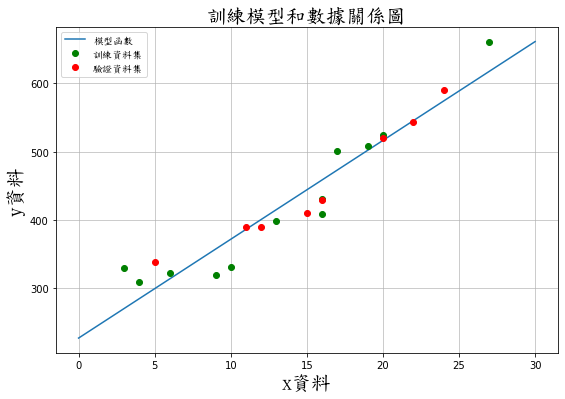

In [93]:
plt.figure(figsize=(9,6))
plt.title("訓練模型和數據關係圖",
          fontproperties=twfont1,fontsize=20) 
plt.xlabel("x資料",fontproperties=twfont1,fontsize=20) 
plt.ylabel("y資料",fontproperties=twfont1,fontsize=20)
x=np.linspace(0,30, 2000)
plt.plot(x, F(x),label="模型函數")
plt.plot(train_x, train_y, 'go',label="訓練資料集")
plt.plot(valid_x, valid_y, 'ro',label="驗證資料集")
plt.legend(prop=twfont1)
plt.grid('k-', alpha=0.8)
plt.show()

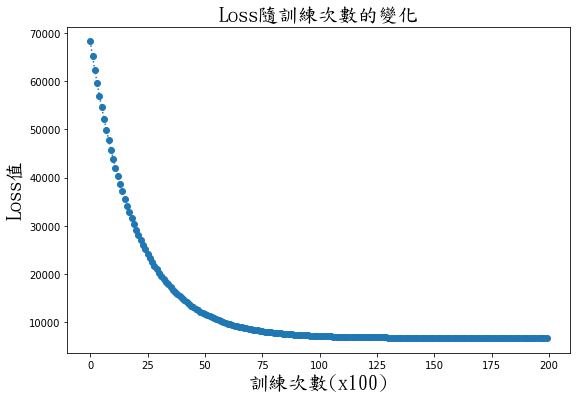

In [94]:
plt.figure(figsize=(9,6))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,":o")
plt.show()

### (9)觀察Loss值隨訓練次數的變化

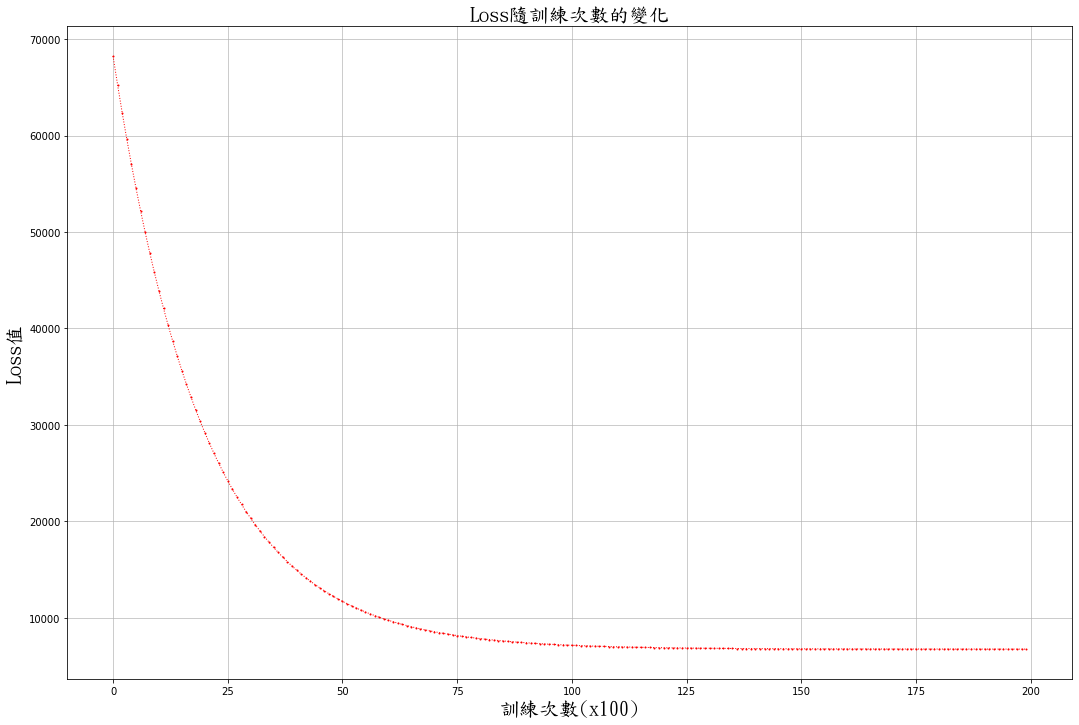

In [95]:
plt.figure(figsize=(18,12))
plt.title("Loss隨訓練次數的變化",fontproperties=twfont1,fontsize=20) 
plt.xlabel("訓練次數(x100)",fontproperties=twfont1,fontsize=20) 
plt.ylabel("Loss值",fontproperties=twfont1,fontsize=20)
plt.plot(Step_Loss,"r:o",lw=1, ms=1)
plt.grid('k-', alpha=0.8)
plt.show()

### (10)比較訓練好的迴歸模型函數在訓練資料集和驗證資料集的每筆平均Loss值

In [96]:
print("訓練資料集對回歸模型的每筆平均Loss值",
      Loss(train_x, train_y)/np.size(train_x))
print("驗證資料集對回歸模型的每筆平均Loss值",
      Loss(valid_x, valid_y)/np.size(valid_x))

訓練資料集對回歸模型的每筆平均Loss值 563.3698703408542
驗證資料集對回歸模型的每筆平均Loss值 243.52489869399722


In [97]:
#I stop Runall

In [98]:
Step_b

[8.00385142244679,
 13.493672511102417,
 18.846910720167983,
 24.06696413542734,
 29.157146300684907,
 34.12068832111051,
 38.96074091425459,
 43.680376410035606,
 48.28259070096873,
 52.77030514387494,
 57.146368414276374,
 61.41355831465583,
 65.57458353772803,
 69.6320853858421,
 73.58863944760621,
 77.44675723279921,
 81.2088877666064,
 84.87741914419291,
 88.45468004659898,
 91.94294121892182,
 95.34441691172107,
 98.66126628656285,
 101.89559478659535,
 105.04945547302509,
 108.12485032834259,
 111.12373152712517,
 114.04800267522238,
 116.8995200181119,
 119.68009361919215,
 122.39148850875983,
 125.03542580440194,
 127.61358380351277,
 130.12759904863032,
 132.5790673662676,
 134.9695448798987,
 137.30054899774268,
 139.57355937597103,
 141.79001885795302,
 143.9513343901312,
 146.0588779151128,
 148.11398724253948,
 150.11796689829214,
 152.07208895256713,
 153.97759382735072,
 155.8356910838043,
 157.64756019006015,
 159.41435126991476,
 161.13718583289494,
 162.8171574861611

In [99]:
np.array(Step_b)

array([  8.00385142,  13.49367251,  18.84691072,  24.06696414,
        29.1571463 ,  34.12068832,  38.96074091,  43.68037641,
        48.2825907 ,  52.77030514,  57.14636841,  61.41355831,
        65.57458354,  69.63208539,  73.58863945,  77.44675723,
        81.20888777,  84.87741914,  88.45468005,  91.94294122,
        95.34441691,  98.66126629, 101.89559479, 105.04945547,
       108.12485033, 111.12373153, 114.04800268, 116.89952002,
       119.68009362, 122.39148851, 125.0354258 , 127.6135838 ,
       130.12759905, 132.57906737, 134.96954488, 137.300549  ,
       139.57355938, 141.79001886, 143.95133439, 146.05887792,
       148.11398724, 150.1179669 , 152.07208895, 153.97759383,
       155.83569108, 157.64756019, 159.41435127, 161.13718583,
       162.81715749, 164.45533263, 166.05275113, 167.61042698,
       169.12934896, 170.61048122, 172.05476396, 173.46311397,
       174.83642522, 176.17556945, 177.48139672, 178.75473592,
       179.99639535, 181.20716316, 182.38780792, 183.53

In [100]:
pd.Series(Step_b)

0        8.003851
1       13.493673
2       18.846911
3       24.066964
4       29.157146
          ...    
195    227.039877
196    227.080236
197    227.119591
198    227.157967
199    227.195388
Length: 200, dtype: float64

In [101]:
np.array(Step_w)

array([27.45685705, 27.13155373, 26.81434373, 26.50502569, 26.20340326,
       25.90928499, 25.62248417, 25.34281875, 25.07011122, 24.80418845,
       24.54488165, 24.29202623, 24.04546167, 23.80503146, 23.57058299,
       23.34196743, 23.11903966, 22.90165818, 22.689685  , 22.48298556,
       22.28142866, 22.08488635, 21.89323387, 21.70634957, 21.52411483,
       21.34641395, 21.17313415, 21.00416543, 20.83940053, 20.67873486,
       20.52206644, 20.36929583, 20.22032603, 20.0750625 , 19.93341303,
       19.79528769, 19.66059882, 19.52926091, 19.40119059, 19.27630658,
       19.15452959, 19.03578232, 18.91998941, 18.80707734, 18.69697444,
       18.58961083, 18.48491834, 18.38283053, 18.2832826 , 18.18621135,
       18.09155516, 17.99925395, 17.90924913, 17.82148356, 17.73590154,
       17.65244875, 17.57107219, 17.49172023, 17.41434249, 17.33888986,
       17.26531443, 17.19356951, 17.12360955, 17.05539014, 16.98886799,
       16.92400086, 16.86074758, 16.79906799, 16.73892295, 16.68

In [102]:
pd.Series(Step_w)

0      27.456857
1      27.131554
2      26.814344
3      26.505026
4      26.203403
         ...    
195    14.477719
196    14.475327
197    14.472995
198    14.470721
199    14.468504
Length: 200, dtype: float64

### (11)動畫顯示偏值b和權重w的移動路徑

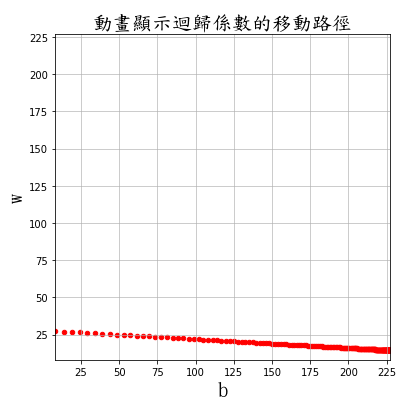

In [103]:
for i in range(len(Step_b)):
    plt.figure(figsize=(6,6))
    plt.title("動畫顯示迴歸係數的移動路徑",
              fontproperties=twfont1,fontsize=20)
    plt.xlabel("b",fontproperties=twfont1,fontsize=20) 
    plt.ylabel("w",fontproperties=twfont1,fontsize=20) 
    # X軸、Y軸刻度取array([Step_b,Step_w])的極值
    plt.xlim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.ylim(np.min(np.array([Step_b,Step_w])),
             np.max(np.array([Step_b,Step_w])))
    plt.scatter(Step_b[:i], Step_w[:i], s=20,color='r')
    plt.grid('k-', alpha=0.8)
    plt.pause(0.1)
    display.clear_output(wait=True)

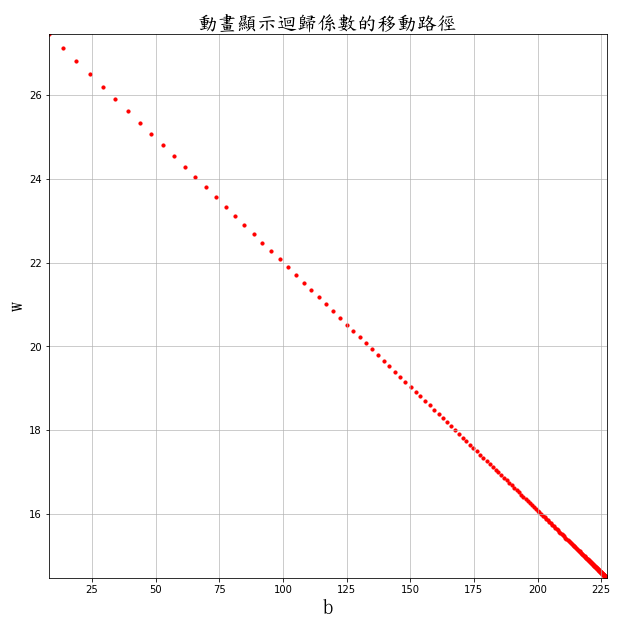

In [104]:
for i in range(len(Step_b)):
    plt.figure(figsize=(10,10))
    plt.title("動畫顯示迴歸係數的移動路徑",
              fontproperties=twfont1,fontsize=20)
    plt.xlabel("b",fontproperties=twfont1,fontsize=20) 
    plt.ylabel("w",fontproperties=twfont1,fontsize=20) 
    # X軸、Y軸刻度取array([Step_b,Step_w])的極值
    plt.xlim(np.min(np.array(Step_b)),
             np.max(np.array(Step_b)))
    plt.ylim(np.min(np.array(Step_w)),
             np.max(np.array(Step_w)))
    plt.scatter(Step_b[:i], Step_w[:i], s=10,color='r')
    plt.grid('k-', alpha=0.8)
    plt.pause(0.1)
    display.clear_output(wait=True)

### (12)顯示迴歸係數在損失函數等高線分布圖的移動路徑

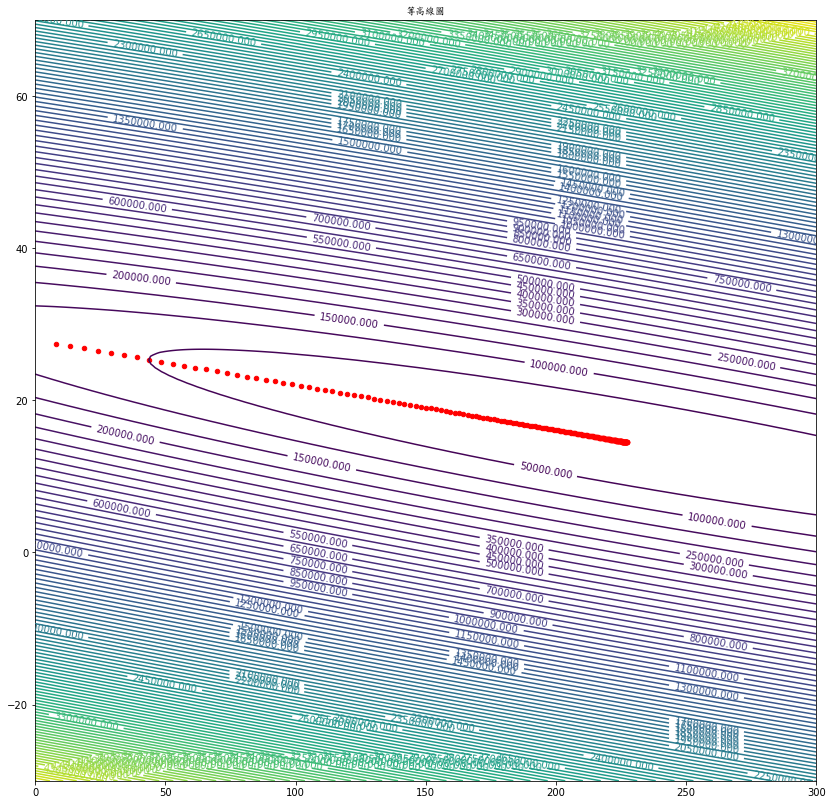

In [105]:
#取b和w的網格範圍
b=np.linspace(0,300,200)
w=np.linspace(-30,70,200)
#計算每一個網格點對應的損失函數值
L=np.zeros((200,200)) 
for i in range(200):
  for j in range(200):
    L[j][i]=0.5*np.sum((train_y-(b[i]+w[j]*train_x))**2)
#鋪設網格
b,w=np.meshgrid(b,w)
# 開啟繪圖區域
plt.figure(figsize=(14,14))
CS=plt.contour(b,w,L,100)
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(Step_b[0:], Step_w[0:], s=20,color='r')
plt.title('等高線圖',fontproperties=twfont1)
plt.show()

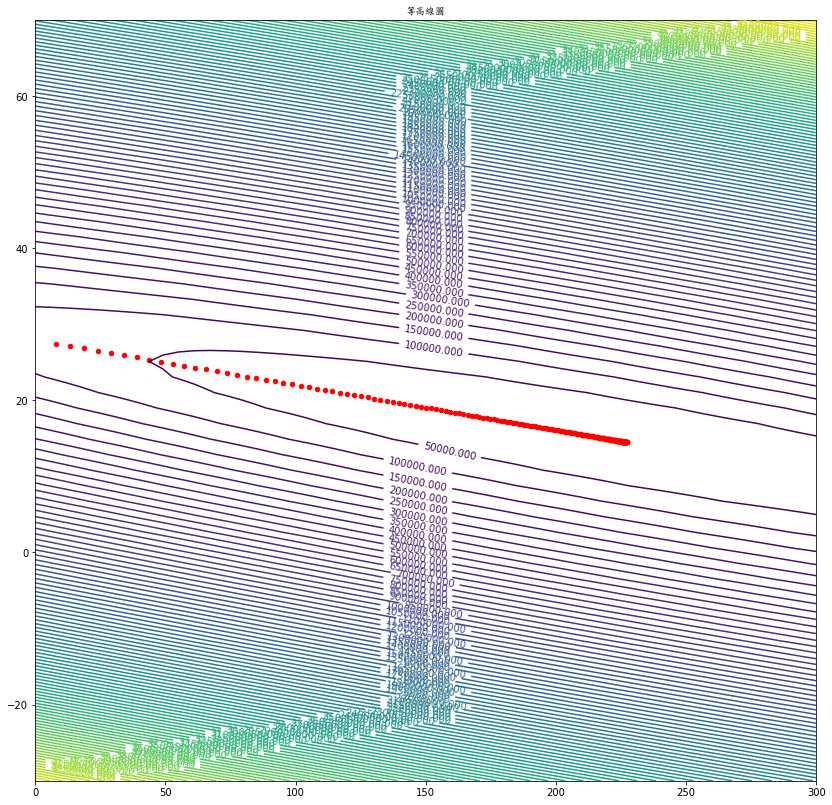

In [106]:
#取b和w的網格範圍
b=np.linspace(0,300,50)
w=np.linspace(-30,70,50)
#計算每一個網格點對應的損失函數值
L=np.zeros((50,50)) 
for i in range(50):
  for j in range(50):
    L[j][i]=0.5*np.sum((train_y-(b[i]+w[j]*train_x))**2)
#鋪設網格
b,w=np.meshgrid(b,w)
# 開啟繪圖區域
plt.figure(figsize=(14,14))
CS=plt.contour(b,w,L,100)
plt.clabel(CS,inline=1,fontsize=10)
plt.scatter(Step_b[0:], Step_w[0:], s=20,color='r')
plt.title('等高線圖',fontproperties=twfont1)
plt.show()